<div class = 'main-container'>
    <div class = 'inner_container'>
        <h1>Brief: Proton Bank</h1>
        <p>In this scenario, you work for Proton Bank, a FinTech organization that offers competitive mortgages.<br><br>Previously, the organization reviewed each application on a case-by-case basis, but as they have become more popular are struggling to keep up with demand.<br><br>You have been asked to use recent loan data to build a Logistic Regression model that will predict if an application will be approved or not. The aim is to use this model to identify key factors that lead to an application being rejected. This will allow the company to filter out overly risky applications automatically and devote more time to working with higher-quality applications.</p>
        <h2>Project Deliverables</h2>
        <p>By the end of the hackathon, you will present:</p>
        <ul>
            <li>A report containing your key insights on employee satisfaction and attrition, including the evidence needed to back up your claims.</li>
            <li>Recommendations for what SecureSolutions should do next based on your findings.</li>
        </ul>
        <br>
    </div>
</div>

<div class = 'main-container'>
    <div class = 'inner_container'>
        <h2>Data Dictionary</h2>
        <br>
        <details>
            <summary><b class = "sol_text">Proton Bank data</b></summary>      
            <br>
            <table class = "tb">
                <tr class = "tr-head">
                    <th>Feature</th>
                    <th>Description</th>
                    <th>Expected Values</th>
                </tr>
                <tr class = "tr-main">
                    <td>Loan_ID</td>
                    <td>Unique ID for loan application</td>
                    <td>String</td>
                </tr>
                <tr class = "tr-main-alt">
                    <td>Married</td>
                    <td>Indicates if the applicant is married</td>
                    <td>String</td>
                </tr>
                <tr class = "tr-main">
                    <td>Dependents</td>
                    <td>How many dependents the applicant has</td>
                    <td>Integer</td>
                </tr>
                <tr class = "tr-main-alt">
                    <td>Education</td>
                    <td>Applicant's level of education</td>
                    <td>String</td>
                </tr>
                <tr class = "tr-main">
                    <td>Self-Employed</td>
                    <td>Indicates if the applicant is self employed</td>
                    <td>String</td>
                </tr>
                <tr class = "tr-main-alt">
                    <td>ApplicantIncome</td>
                    <td>Applicant's annual income</td>
                    <td>Integer</td>
                </tr>
                <tr class = "tr-main">
                    <td>CoapplicantIncome</td>
                    <td>Co-applicant's annual income</td>
                    <td>Integer</td>
                </tr>
                <tr class = "tr-main-alt">
                    <td>LoanAmount</td>
                    <td>The amount applicant has requested to loan (in thousands)</td>
                    <td>Integer</td>
                </tr>
                <tr class = "tr-main">
                    <td>Loan_Amount_Term</td>
                    <td>How long the loan has been requested for</td>
                    <td>Integer</td>
                </tr>
                <tr class = "tr-main-alt">
                    <td>Credit_History</td>
                    <td>Indicates if the applicant's credit history is sufficient</td>
                    <td>Float</td>
                </tr>
                <tr class = "tr-main">
                    <td>Property_Area</td>
                    <td>Area description the applicant lives</td>
                    <td>String</td>
                </tr>
                <tr class = "tr-main-alt">
                    <td>Loan_Status</td>
                    <td>Indicates if the loan has been approved</td>
                    <td>1 or 0</td>
                </tr>             
            </table>
        </details>
        <br>
    </div>
</div>

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

scaler = StandardScaler()
model = LogisticRegression()

os.chdir(r'C:\Users\jf79\Repos\MP-Proton-Bank-Model')
import myfuncs.myfuncs as mf
import repofuncs.repofuncs as rf

import warnings

warnings.filterwarnings('ignore')

In [2]:
loans = pd.read_csv('data\proton_loans.csv')

mf.strip_dataframe(loans)

columns_to_change = {
    'Loan_ID':'loan_id',
    'Married':'married',
    'Dependents':'dependents',
    'Education':'education',
    'Self_Employed':'self_employed',
    'ApplicantIncome':'applicant_income',
    'CoapplicantIncome':'coapplicant_income',
    'LoanAmount':'loan_amount',
    'Loan_Amount_Term':'loan_amount_term',
    'Credit_History':'credit_history',
    'Property_Area':'property_area',
    'Loan_Status':'loan_status'
}

loans = loans.rename(columns=columns_to_change)
mf.unique_values(loans)

Number of records: 10


,loan_id,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001003,No,0,Graduate,No,0.0,0.0,9.0,6.0,0.0,Rural,0.0
1,LP001005,Yes,1,Not Graduate,Yes,150.0,16.120001,17.0,12.0,1.0,Semiurban,1.0
2,LP001006,--,2,--,--,570.0,187.0,25.0,36.0,--,Urban,--
3,LP001008,--,3+,--,--,645.0,189.0,26.0,60.0,--,--,--
4,LP001011,--,--,--,--,674.0,240.0,28.0,84.0,--,--,--
5,LP001013,--,--,--,--,724.0,242.0,30.0,120.0,--,--,--
6,LP001014,--,--,--,--,1000.0,250.0,35.0,180.0,--,--,--
7,LP001015,--,--,--,--,1025.0,292.0,36.0,240.0,--,--,--
8,LP001018,--,--,--,--,1141.0,296.0,40.0,300.0,--,--,--
9,LP001020,--,--,--,--,1173.0,333.0,44.0,350.0,--,--,--


In [3]:
mf.validate_data(loans)

#####################################################################################################################################################################
Validation Dataframe
Number of records: 791


,loan_id,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,LP001011,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
786,LP002969,Yes,1,Graduate,No,2269,2167.0,99.0,360.0,1.0,Semiurban,0
787,LP002971,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,0
788,LP002975,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,0
789,LP002986,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,0


Unique Values
Number of records: 10


,loan_id,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001003,No,0,Graduate,No,0.0,0.0,9.0,6.0,0.0,Rural,0.0
1,LP001005,Yes,1,Not Graduate,Yes,150.0,16.120001,17.0,12.0,1.0,Semiurban,1.0
2,LP001006,--,2,--,--,570.0,187.0,25.0,36.0,--,Urban,--
3,LP001008,--,3+,--,--,645.0,189.0,26.0,60.0,--,--,--
4,LP001011,--,--,--,--,674.0,240.0,28.0,84.0,--,--,--
5,LP001013,--,--,--,--,724.0,242.0,30.0,120.0,--,--,--
6,LP001014,--,--,--,--,1000.0,250.0,35.0,180.0,--,--,--
7,LP001015,--,--,--,--,1025.0,292.0,36.0,240.0,--,--,--
8,LP001018,--,--,--,--,1141.0,296.0,40.0,300.0,--,--,--
9,LP001020,--,--,--,--,1173.0,333.0,44.0,350.0,--,--,--



DataFrame: info_df
Number of duplicated records: 0


,Field Name,No. of Unique Values,No. of Non-Null Values,Data Type
0,loan_id,791,791,object
1,married,2,791,object
2,dependents,4,791,object
3,education,2,791,object
4,self_employed,2,791,object
5,applicant_income,624,791,int64
6,coapplicant_income,364,791,float64
7,loan_amount,218,791,float64
8,loan_amount_term,12,791,float64
9,credit_history,2,791,float64



Summary statistics:
Number of records: 8


,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,loan_status
count,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000
mean,5190.077118,1555.552364,142.567636,342.245259,0.847029,0.428571
std,5677.816273,2506.049736,75.895399,65.011980,0.360187,0.495185
min,0.000000,0.000000,9.000000,6.000000,0.000000,0.000000
25%,2885.500000,0.000000,100.500000,360.000000,1.000000,0.000000
50%,3846.000000,1032.000000,128.000000,360.000000,1.000000,0.000000
75%,5575.500000,2333.000000,163.500000,360.000000,1.000000,1.000000
max,81000.000000,33837.000000,700.000000,480.000000,1.000000,1.000000


End of data validation
#####################################################################################################################################################################


In [4]:
loans_df = loans.copy()
yes_no_map = {'Yes': 1, 'No': 0}
education_map = {'Graduate': 1, 'Not Graduate': 0}

loans_df[['married', 'self_employed']] = loans_df[['married', 'self_employed']].applymap(lambda x: yes_no_map.get(x, x))
loans_df['education'] = loans_df['education'].map(lambda x: education_map.get(x, x))

loans_df['dependents'] = loans_df['dependents'].str.strip('+').astype(float)

loans_df = pd.get_dummies(loans_df, columns=['property_area'])

bool_cols = loans_df.select_dtypes(include='bool').columns
loans_df[bool_cols] = loans_df[bool_cols].astype(float)
int_cols = loans_df.select_dtypes(include='int').columns
loans_df[int_cols] = loans_df[int_cols].astype(float)

loans_df['total_household_income'] = loans_df['applicant_income'] + loans_df['coapplicant_income']

columns_to_scale = [
    'applicant_income','coapplicant_income','loan_amount','loan_amount_term', 'total_household_income'
]

for column in columns_to_scale:
    loans_df[column] = scaler.fit_transform(loans_df[[column]])

loans_df.set_index(keys='loan_id', inplace=True)

loans_df.drop(columns=['property_area_Urban','applicant_income'], inplace=True)

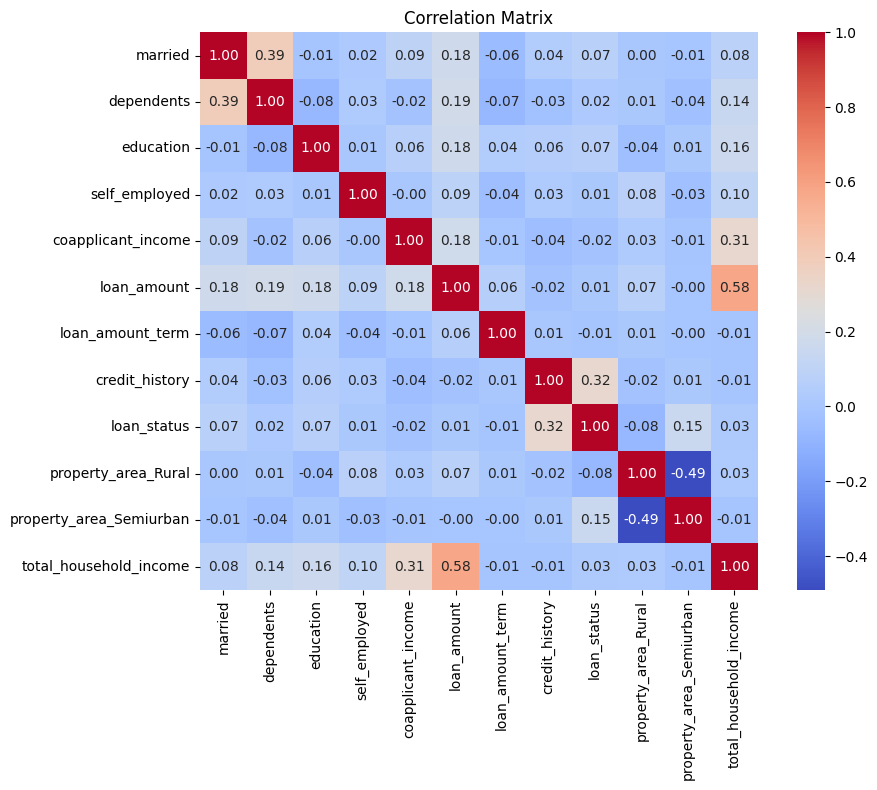

DataFrame: vif_data
Number of records: 13


,Feature,VIF
0,const,14.463626
1,married,1.217540
2,dependents,1.235467
3,education,1.061378
4,self_employed,1.022514
5,coapplicant_income,1.134159
6,loan_amount,1.601871
7,loan_amount_term,1.018137
8,credit_history,1.123383
9,loan_status,1.150633


In [5]:
rf.plot_correlation_matrix(loans_df)
rf.calculate_vif(loans_df)

In [6]:
X = loans_df.drop(columns='loan_status')
y = loans_df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)

# Get predictions
predictions = model.predict(X_test)

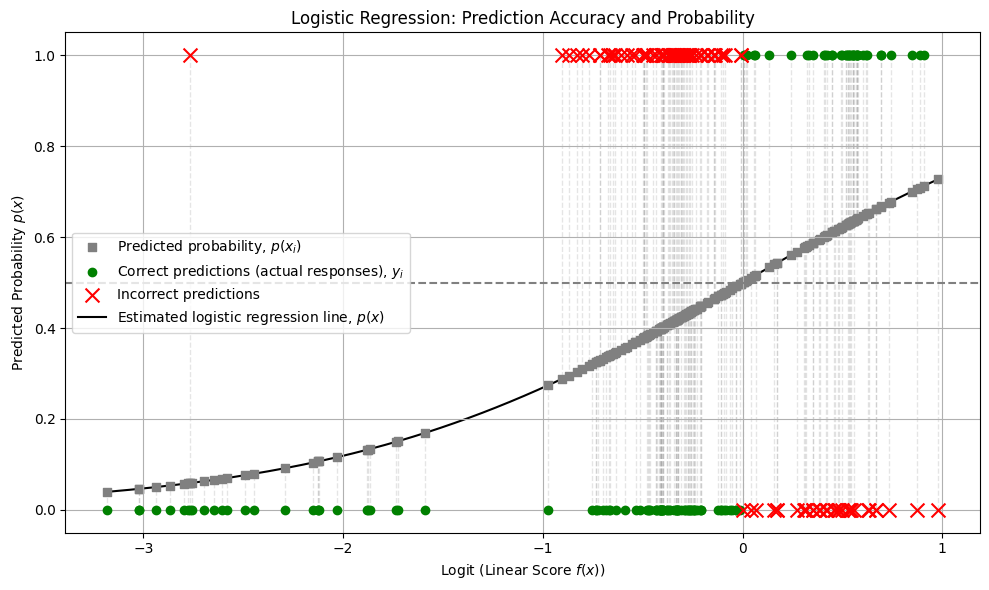

In [7]:
# Get logit values and probabilities
logits = model.decision_function(X_test)
rf.plot_sigmoid_function(logits, predictions=predictions, y_test=y_test)

Accuracy:  0.59
              precision    recall  f1-score   support

         0.0       0.60      0.75      0.67       131
         1.0       0.57      0.40      0.47       107

    accuracy                           0.59       238
   macro avg       0.59      0.57      0.57       238
weighted avg       0.59      0.59      0.58       238



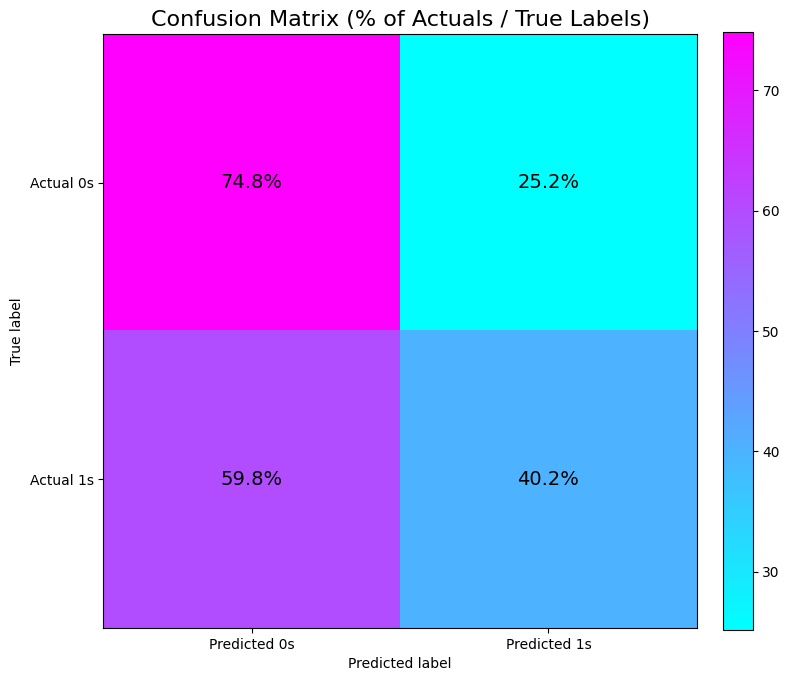

In [8]:
accuracy = accuracy_score(y_test , predictions)
print(f'Accuracy: {accuracy: .2f}')
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
rf.plot_confusion_matrix(cm, normalize=True)

In [9]:
score = model.score(X_test, y_test)
baseline = y.value_counts(normalize = True).max()

print('Model Accuracy: {}, Baseline Accuracy: {}'.format(score, baseline))

Model Accuracy: 0.592436974789916, Baseline Accuracy: 0.5714285714285714


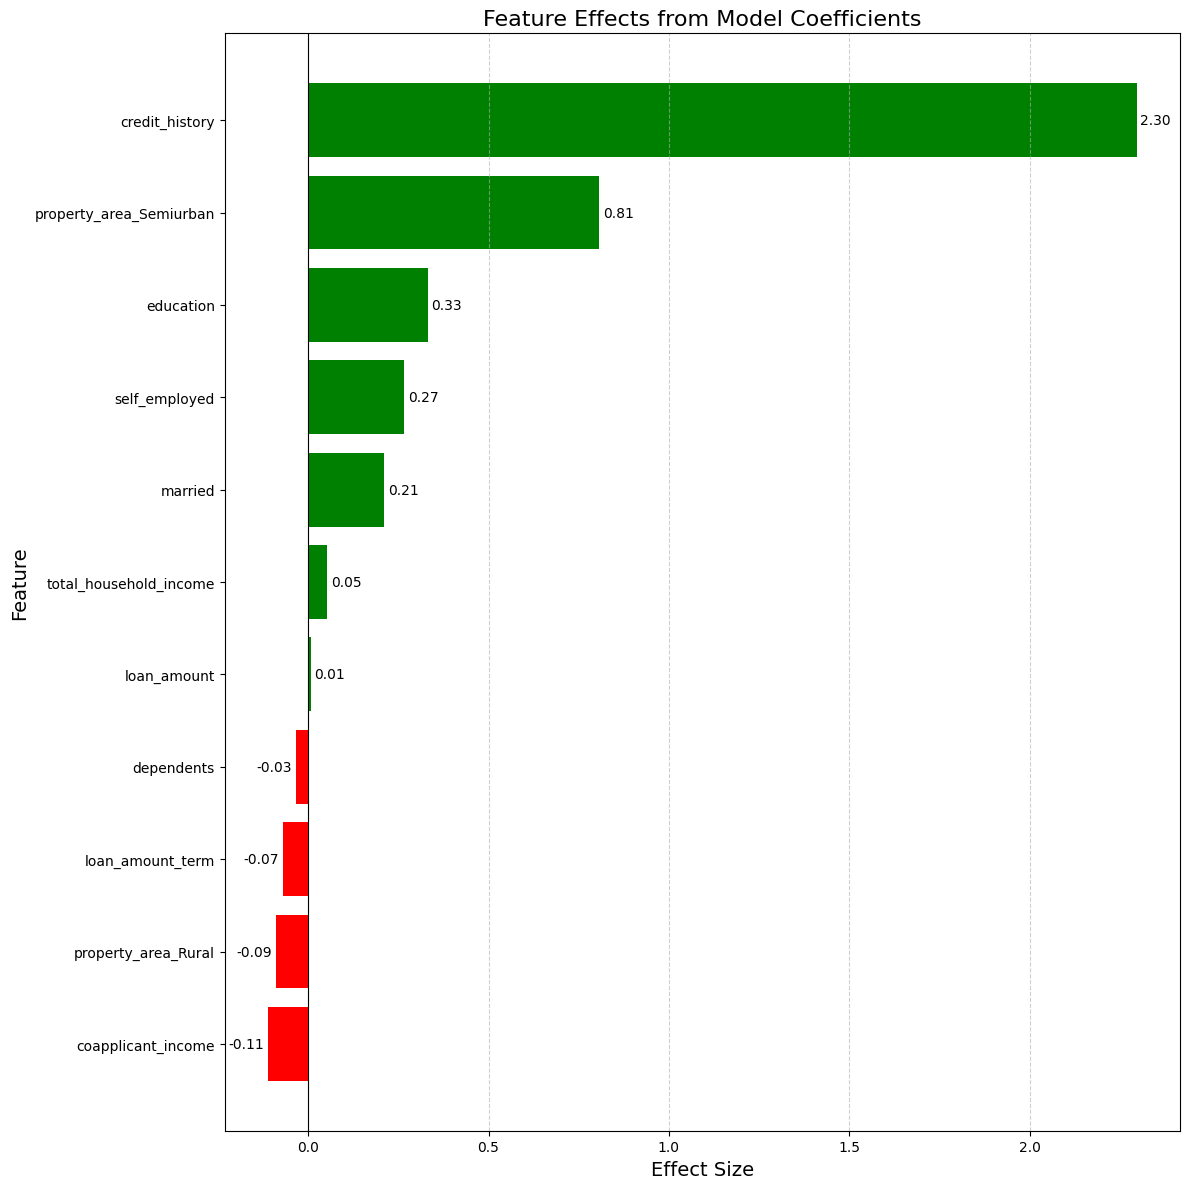

In [ ]:


rf.evaluate_coeffcients(model, X)